# Getting Started With ASE

[The atomistic simulation environment](https://wiki.fysik.dtu.dk/ase/index.html) (ASE) is an extremely powerful set of tools and Python modules for generating atomic structures and performing density functional theory calculations (DFT.) It can be used for working with and analyzing atomistic simulations. To install ASE on your local machine, run the commands in the next code block:

In [10]:
!pip install ase #install ASE to your local/remote machine
!pip install nglview #this needs to be install to visualize structures through jupyter notebook
!jupyter-nbextension enable nglview --py --sys-prefix  # this might be needed

Enabling notebook extension nglview-js-widgets/extension...
      - Validating: OK


In this lesson, we will learn how to use the ASE Atoms object, building different chemical systems like molecule, bulk and surfaces and setting up constraints. 

## The Atoms Object
ASE allows you to manipulate atomic structures in a programitic way using the [ASE atoms object](https://wiki.fysik.dtu.dk/ase/ase/atoms.html). This is a `class` in python that can store the positions and identities of atoms in a structure and manipulate them in useful ways. This is pretty abstract, so here is an example of generating an atoms object:

In [11]:
from ase.atoms import Atoms # import the Atoms class from ASE

H2 = Atoms(symbols='HH', positions=[(0,0,0), (0,0,0.75)])
print(H2)

Atoms(symbols='H2', pbc=False)


The code above just generates an H$_2$ molecule, one hydrogen at the origin and one 0.75 angstroms up in the z direction. We can now manipulate it in interesting ways. Let's say we want to add a second H$_2$ molecule 2 angstroms away. We can do this by simply adding atoms objects to the one we already have

In [12]:
H2 = H2 + Atoms('H2', positions = [(2,0,0), (2,0,0.75)])
print(H2)
print(H2.positions)

Atoms(symbols='H4', pbc=False)
[[0.   0.   0.  ]
 [0.   0.   0.75]
 [2.   0.   0.  ]
 [2.   0.   0.75]]


So now we have have two H$_2$ molecules, we can shift all the atoms by simply adding an array to their positions

In [13]:
H2.positions = H2.positions + [0,0,1]
print(H2.positions)

[[0.   0.   1.  ]
 [0.   0.   1.75]
 [2.   0.   1.  ]
 [2.   0.   1.75]]


What does this look like though? We can visualize any structure using ASE's built in visualization tools

In [14]:
from ase.visualize import view

view(H2, viewer='ngl') # removing viewer='ngl' makes a pop-up window

Instead of visualizing the atoms object by using ASE visualizer or nglview, we can also use **plot_atoms** method in ASE which uses matplotlib as backend. It is useful to generate simple projections in jupyter notebook. 

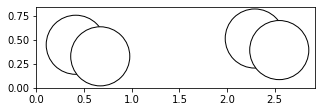

In [21]:
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms

fig, axs = plt.subplots(figsize=[5,2])
plot_atoms(H2,rotation='10x,20y,2z')
#plt.savefig('cell_example.svg')

Atoms objects are also able to be indexed like lists. Each individual atom has an index and can be accessed in this way. When you call an index of an atoms object, you get an `Atom` object. This is just an object that represents a single atom. `Atoms` objects are simply a collection of `Atom` objects

In [23]:
print(H2[0]) #prints the atom at index 0 of list H2
print(H2[0].position) #prints the position of atom at index 0 of list H2
print(H2[0].symbol) #prints the symbol of atom at index 0 of list H2

Atom('H', [0.0, 0.0, 1.0], index=0)
[0. 0. 1.]
H


For our DFT calculations involving metals and metal oxides, we will be doing periodic calculations. For these periodic calculations, we would want to put these atoms into a unit cell (a simulation box) to do this we want to use the `set_cell` method. Let's use a 10 angstrom box. We will also need to write this to a file. ASE atoms objects have a `write` method that allows you to write to [almost any file type you can imagine](https://wiki.fysik.dtu.dk/ase/ase/io/io.html) (including .png images).

In [24]:
H2.set_cell([10,10,10])
H2.center() # this centers it in the unit cell
print(H2.cell)

Cell([10.0, 10.0, 10.0])


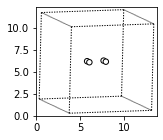

In [25]:
fig, axs = plt.subplots(figsize=[5,2])
plot_atoms(H2,rotation='10x,20y,2z')

We can also write and read files using ASE. For this we will need to import `read` and `write` method from ase.io. 

In [26]:
H2.write('2_hydrogens.xyz')

from ase.io import read # for reading files

H2_2 = read('2_hydrogens.xyz')

There are lots of useful things you can do to manipulate atoms, they are all documentated in the [ASE atoms object documentation](https://wiki.fysik.dtu.dk/ase/ase/atoms.html).

But having to have all the positions for the atoms in an atoms object is quite onerous. Luckily, there are [tools to build structures in ASE](https://wiki.fysik.dtu.dk/ase/ase/build/build.html). There are methods like `molecule`, `'bulk`, `surfaces` etc that can be used to build structures using ASE's database if the positions and unit cell information is not known. For example, the `ase.lattice` module has functions that can create common crystal structures if the use specifies miller indices. There is a `molecule `function that holds the positions of lots of common molecules. Similarly, the `bulk` function contains tons of bulk structures for metals. We'll use this to generate surfaces a little later on. Let's see how the `molecule` and `bulk` methods work:

### Building a molecule

Atoms(symbols='OH2', pbc=False)
[[ 0.        0.        0.119262]
 [ 0.        0.763239 -0.477047]
 [ 0.       -0.763239 -0.477047]]


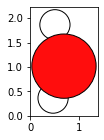

In [27]:
from ase.build import molecule, bulk
#from ase.data.pubchem import pubchem_atoms_search

water = molecule('H2O')
print(water)
print(water.positions)
#view(water, viewer='ngl')

fig, axs = plt.subplots(figsize=[5,2])
plot_atoms(water,rotation='10x,20y,2z')

ASE has the G2-database of common molecules. To see the list of available molecules in this database, run the following code block:

In [2]:
from ase.collections import g2
print(g2.names)

['PH3', 'P2', 'CH3CHO', 'H2COH', 'CS', 'OCHCHO', 'C3H9C', 'CH3COF', 'CH3CH2OCH3', 'HCOOH', 'HCCl3', 'HOCl', 'H2', 'SH2', 'C2H2', 'C4H4NH', 'CH3SCH3', 'SiH2_s3B1d', 'CH3SH', 'CH3CO', 'CO', 'ClF3', 'SiH4', 'C2H6CHOH', 'CH2NHCH2', 'isobutene', 'HCO', 'bicyclobutane', 'LiF', 'Si', 'C2H6', 'CN', 'ClNO', 'S', 'SiF4', 'H3CNH2', 'methylenecyclopropane', 'CH3CH2OH', 'F', 'NaCl', 'CH3Cl', 'CH3SiH3', 'AlF3', 'C2H3', 'ClF', 'PF3', 'PH2', 'CH3CN', 'cyclobutene', 'CH3ONO', 'SiH3', 'C3H6_D3h', 'CO2', 'NO', 'trans-butane', 'H2CCHCl', 'LiH', 'NH2', 'CH', 'CH2OCH2', 'C6H6', 'CH3CONH2', 'cyclobutane', 'H2CCHCN', 'butadiene', 'C', 'H2CO', 'CH3COOH', 'HCF3', 'CH3S', 'CS2', 'SiH2_s1A1d', 'C4H4S', 'N2H4', 'OH', 'CH3OCH3', 'C5H5N', 'H2O', 'HCl', 'CH2_s1A1d', 'CH3CH2SH', 'CH3NO2', 'Cl', 'Be', 'BCl3', 'C4H4O', 'Al', 'CH3O', 'CH3OH', 'C3H7Cl', 'isobutane', 'Na', 'CCl4', 'CH3CH2O', 'H2CCHF', 'C3H7', 'CH3', 'O3', 'P', 'C2H4', 'NCCN', 'S2', 'AlCl3', 'SiCl4', 'SiO', 'C3H4_D2d', 'H', 'COF2', '2-butyne', 'C2H5', 'BF3'

### Building a bulk crystal

For building a bulk crystal, different inputs like type of crystal structure, lattice constants, type of cell (`orthorhombic` and `cubic`) can be provided to the `bulk` method of ASE. If any of the inputs are not provided, then they will be guessed by ASE's method. Let's look at the following examples:

In [29]:
iron = bulk('Fe', cubic = True)
print(iron)
print(iron.positions)

Atoms(symbols='Fe2', pbc=True, cell=[2.87, 2.87, 2.87])
[[0.    0.    0.   ]
 [1.435 1.435 1.435]]


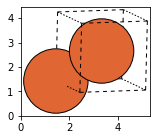

In [30]:
#view(iron, viewer='ngl')
fig, axs = plt.subplots(figsize=[5,2])
plot_atoms(iron,rotation='10x,20y,2z')

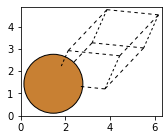

In [31]:
Cu = bulk('Cu', 'fcc', a=3.6)
fig, axs = plt.subplots(figsize=[5,2])
plot_atoms(Cu,rotation='10x,20y,2z')
#view(Cu, viewer='nglview')

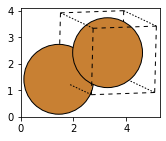

In [33]:
Cu_orthorhombic = bulk('Cu', 'fcc', a=3.6, orthorhombic=True)
fig, axs = plt.subplots(figsize=[5,2])
plot_atoms(Cu_orthorhombic,rotation='10x,20y,2z')
#view(Cu_orthorhombic, viewer='nglview')

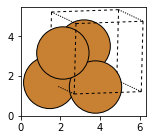

In [34]:
Cu_cubic = bulk('Cu', 'fcc', a=3.6, cubic=True)
fig, axs = plt.subplots(figsize=[5,2])
plot_atoms(Cu_cubic,rotation='10x,20y,2z')
#view(Cu_cubic, viewer='nglview')

### Building surfaces

There are many functions in ASE to set up common surfaces, adding vacuum layers and adsorbates at specific locations on the surface. [General crystal structures and surfaces](https://wiki.fysik.dtu.dk/ase/ase/lattice.html#general-crystal-section) can be used to set up these surfaces. There are also many utility functions that make this task easier. Let's take a look at a few examples from ASE's documentation:

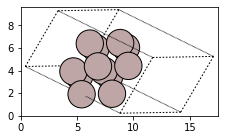

In [42]:
#Setting up Al(111) surface slab with 10 Ang vacuum on either side 
from ase.build import fcc111
slab = fcc111('Al', size=(2,2,3), vacuum=10.0)
fig, axs = plt.subplots(figsize=[5,2])
plot_atoms(slab,rotation='10x,20y,1z')
#view(slab, viewer='nglview')

The above code block sets up an Al(111) surface with a vacuum of 10 Angstrom on each side in the z-direction. The size of the slab is 2x2x3 which means that the minimum possible size is repeated in twice in x and y-directions and thrice in the z-direction. Now if we want to adsorb a hydrogen atom in an on-top position 2 Angstrom above the top layer, we can use the method `add_adsorbate` in ase.build:

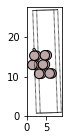

In [45]:
from ase.build import add_adsorbate
slab = fcc111('Al', size=(2,2,3))
add_adsorbate(slab, 'H', 1.5, 'ontop')
slab.center(vacuum=10.0, axis=2)
fig, axs = plt.subplots(figsize=[5,2])
plot_atoms(slab,rotation='-90x,20y,2z')
#view(slab, viewer='nglview')

Note: The vacuum should only be added after adding the adsorbate to the slab surface. ASE also sets tags to the layer number, for example adsorbates will have tag=0, first layer will have tag=1 and so on. To learn more about how to use ASE's utility functions, go through [Surfaces](https://wiki.fysik.dtu.dk/ase/ase/build/surface.html) where all the information has been summarised. 

### Setting up constraints 

When doing quantum mechanical calculations like geometry optimization or dynamics, we may have to fix some degrees of freedom in a system. ASE has constraint object(s) that can be attached directly to atoms object. When we set constraints to atoms object, it will freeze the corresponding atom positions. This can be done by using **atoms_obj.set_constraint()** where **atoms_obj** is an ase atoms object. An example of this is shown below:

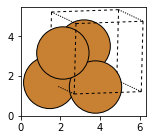

In [51]:
from ase.constraints import FixAtoms

c = FixAtoms(mask=[atom.symbol == 'Cu' for atom in Cu_cubic])

fig, axs = plt.subplots(figsize=[5,2])
plot_atoms(Cu_cubic,rotation='10x,20y,2z')

The constraints won't show up if we plot the atoms using **plot_atoms()**. You can use **view(Cu_cubic)** to verify if the constraints have been put on the atoms. There are different classes of constraints in ASE similar to FixAtoms for example: FixBongLengths, FixedLine, FixedPlane etc. To learn more about ASE constraints, go through [Constraints](https://wiki.fysik.dtu.dk/ase/ase/constraints.html). This information will come handy while performing geometry optimization of slabs with adsorbed species. In these calculations, we fix the bottom two layers of slab and relax the top layers and adsorbate while doing a DFT calculation. 

## Summary

ASE is an excellent tool which can be used to build structures and set up atomistic total energy calculations and molecular dynamics simulations. It can be used via graphical user interface, command line and python. Covering all the different utility functions in the ASE package is beyond the scope of this lesson. For more information or help with the utility functions, read through the [ASE documentation](https://wiki.fysik.dtu.dk/ase/ase/ase.html). 